importig necessary libraries for visualization and preprocessing 

In [42]:
import pandas as pd
import seaborn as sb
from  matplotlib import pyplot as plt
import numpy as np

importing data 

In [43]:
data= pd.read_csv('advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


data visualizations

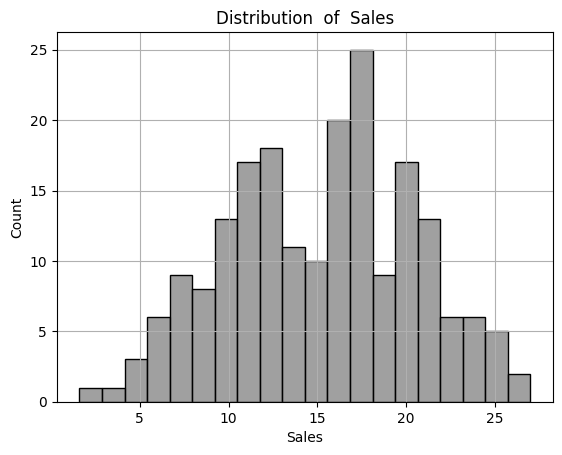

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

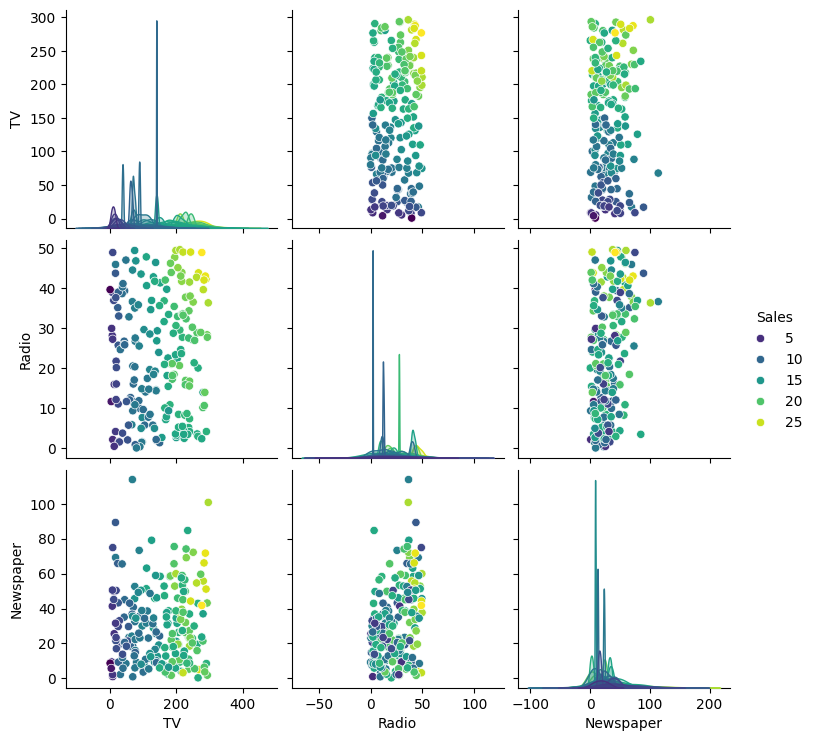

In [44]:
sb.histplot(data['Sales'], bins=20,color='grey')
plt.title('Distribution  of  Sales')
plt.grid()
plt.show()
plt.figure(figsize=(10, 8))
sb.pairplot(data, hue='Sales', palette='viridis')
plt.show()


In [45]:

data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


counting null values


In [47]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_2372\243061606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x='variable', y='value', data=pd.melt(data[['TV', 'Radio', 'Newspaper']]), palette='Set2')


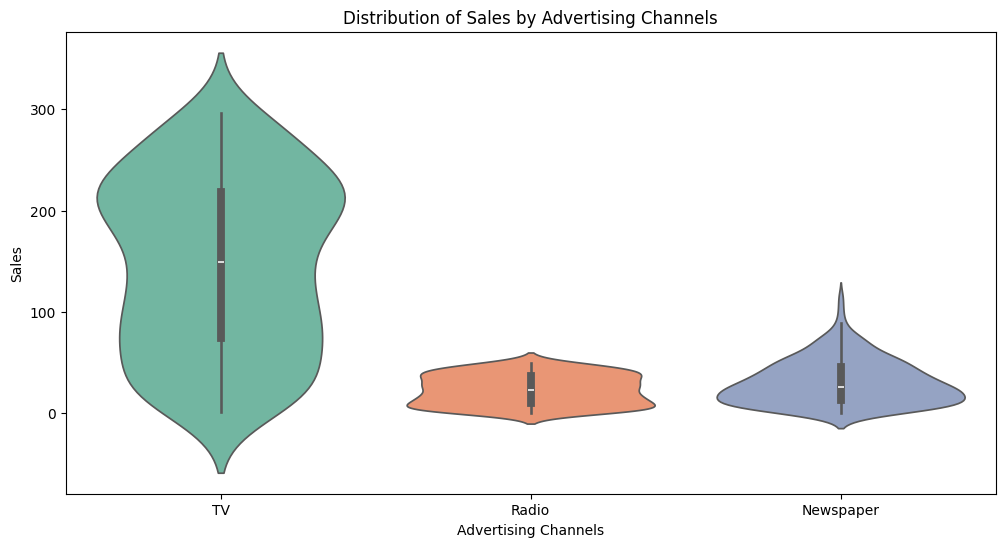

In [48]:
plt.figure(figsize=(12, 6))
sb.violinplot(x='variable', y='value', data=pd.melt(data[['TV', 'Radio', 'Newspaper']]), palette='Set2')
plt.title('Distribution of Sales by Advertising Channels')
plt.xlabel('Advertising Channels')
plt.ylabel('Sales')
plt.show()


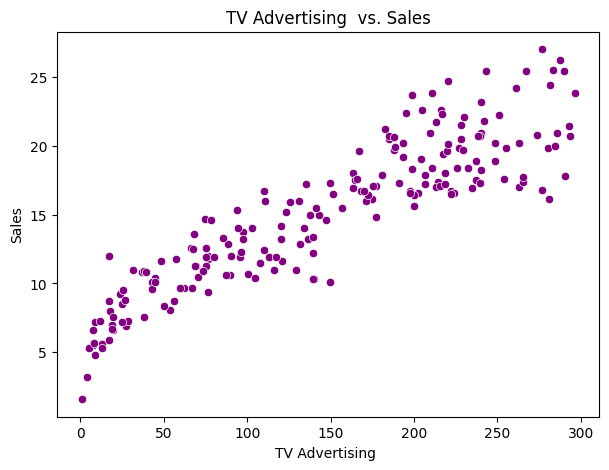

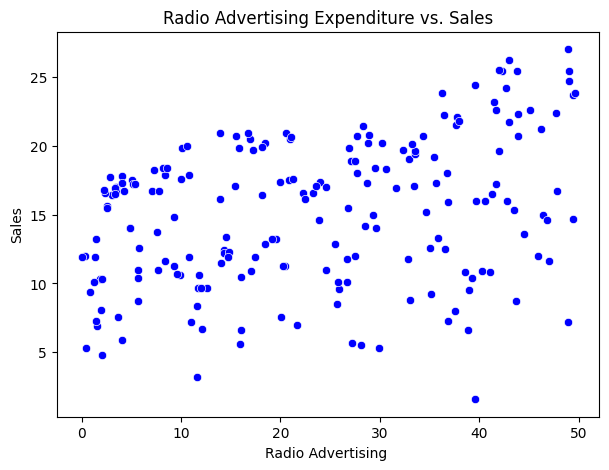

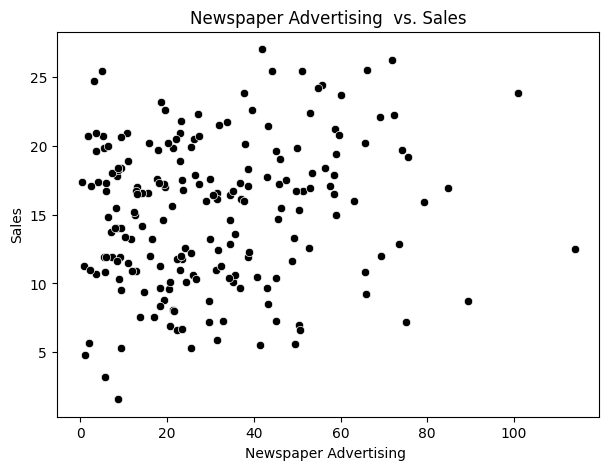

In [49]:
plt.figure(figsize=(7, 5))
sb.scatterplot(x='TV', y='Sales', data=data,color='purple')
plt.title('TV Advertising  vs. Sales')
plt.xlabel('TV Advertising ')
plt.ylabel('Sales')
plt.show()


plt.figure(figsize=(7, 5))
sb.scatterplot(x='Radio', y='Sales', data=data ,color='blue')
plt.title('Radio Advertising Expenditure vs. Sales')
plt.xlabel('Radio Advertising ')
plt.ylabel('Sales')
plt.show()


plt.figure(figsize=(7, 5))
sb.scatterplot(x='Newspaper', y='Sales', data=data,color='black')
plt.title('Newspaper Advertising  vs. Sales')
plt.xlabel('Newspaper Advertising ')
plt.ylabel('Sales')
plt.show()

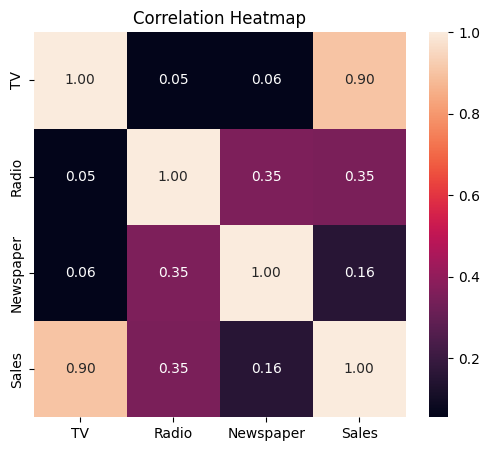

In [50]:
plt.figure(figsize=(6, 5))
sb.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


dividing features and target

In [51]:
X=data.drop(columns=["Sales"],axis=1)
Y=data["Sales"]

In [52]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [53]:
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

other libraries for lineargression, daata splitting and accuracy

In [54]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [55]:
model = lr()

splitting of data

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

caluculating MSE,MAE,R2-error,RMSE

In [57]:
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print("mean absolute error  :",mean_absolute_error(Y_test,y_pred))
print("mean-squared error  :",mean_squared_error(Y_test,y_pred))
print("mean r2-score  :",r2_score(Y_test,y_pred))

mean absolute error  : 1.2748262109549338
mean-squared error  : 2.9077569102710896
mean r2-score  : 0.9059011844150826


In [58]:
print("root mean squared error :",np.sqrt(mean_absolute_error(Y_test,y_pred)))

root mean squared error : 1.1290820213584722


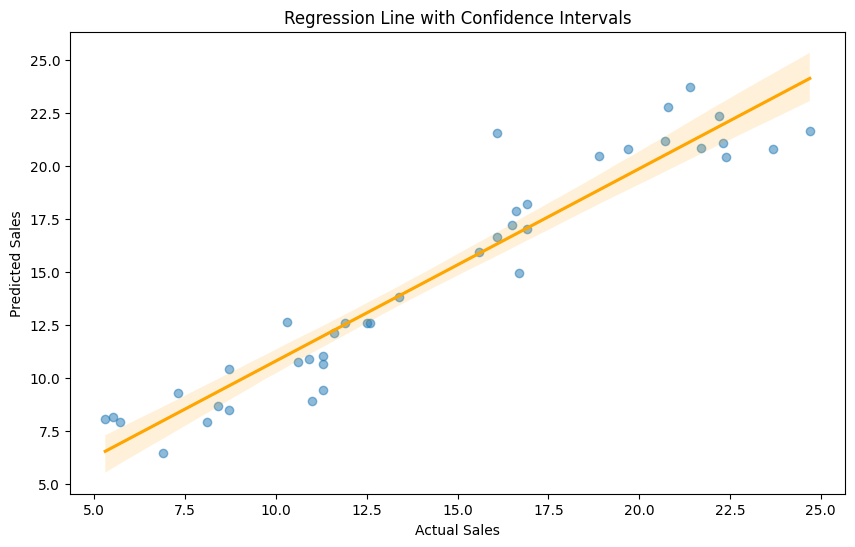

In [59]:
plt.figure(figsize=(10, 6))
sb.regplot(x=Y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color': 'orange'})
plt.title('Regression Line with Confidence Intervals')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


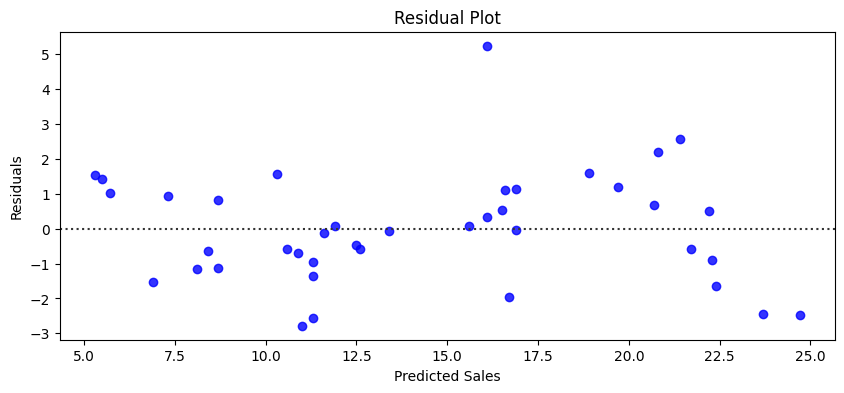

In [60]:

plt.figure(figsize=(10, 4))
sb.residplot(x=Y_test,y=y_pred,color='blue')
plt.title('Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.show()

prediction on random values

In [61]:
result =model.predict([[22,4,53]])
print(" sales result on some random values",result)

 sales result on some random values [6.54695409]


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
